Reponses au test 


setup non exhaustif, si il y a des problèmes lors du lancement du notebook on peut décommenter les lignes.

In [2]:
#!pip install pyarrow
#!pip install opencv-python

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

On commence par transformer le parquet en un fichier panda pour pouvoir lire les données plus facilement et les transformer en dictionnaires car l'algorithme qui trace les cubes sur les images prend des dictionnaires en entrée !

In [10]:
import pyarrow.parquet as pq
import pandas as pd

#on converti le fichier en une dataframe panda !
df = pd.read_parquet('series.pq', engine='pyarrow')

#test pour voir comment est construite la dataframe afin de pouvoir la manipuler après.
print('label des colonnes de la dataframe: ',df.columns)
print('nombre de paramètres: ',len(df.columns))

label des colonnes de la dataframe:  Index(['a-rotation-x', 'a-rotation-y', 'a-rotation-z', 'a-translation-x',
       'a-translation-y', 'a-translation-z', 'b-rotation-x', 'b-rotation-y',
       'b-rotation-z', 'b-translation-x', 'b-translation-y', 'b-translation-z',
       'c-rotation-x', 'c-rotation-y', 'c-rotation-z', 'c-translation-x',
       'c-translation-y', 'c-translation-z'],
      dtype='object')
nombre de paramètres:  18


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
il faut maintenant mettre les données au bon format, on transforme le dataframe en une liste de dictionnaires pour chaque image et pour chaque dataset (a,b,c)

In [12]:
import pyarrow.parquet as pq
import pandas as pd
import cv2
import numpy as np
import os
from PIL import Image
from PIL import ImageChops
from numpy import asarray
from copy import deepcopy
from matplotlib import pyplot
from code_source.trace_vecteurs import draw_head_pose

# les listes qui vont récueillir les dictionnaires de chaque frame.

list_a = [] #pour les vecteurs a
list_b = [] #pour les vecteurs b
list_c = [] #pour les vecteurs c

#on parcours le dataframe et on sépare chaque ligne (row) en élément qu'on met 
#dans les différents dictionnaires (un dictionnaire pour chaque set de données (a,b,c))

for i in list(df.index):
    row = df.loc[i] #on lit la ligne i de df

    #un dictionnaire différent pour chaque type de vecteurs
    dict_a = {} 
    dict_b = {}
    dict_c = {}

    # on remplie le dictionnaire pour le dataset a
    dict_a['rotation-x'] = row[0]
    dict_a['rotation-y'] = row[1]
    dict_a['rotation-z'] = row[2]
    dict_a['translation-x'] = row[3]
    dict_a['translation-y'] = row[4]
    dict_a['translation-z'] = row[5]

    # on remplie le dictionnaire pour le dataset b
    dict_b['rotation-x'] = row[6]
    dict_b['rotation-y'] = row[7]
    dict_b['rotation-z'] = row[8]
    dict_b['translation-x'] = row[9]
    dict_b['translation-y'] = row[10]
    dict_b['translation-z'] = row[11]

    # on remplie le dictionnaire pour le dataset c
    dict_c['rotation-x'] = row[12]
    dict_c['rotation-y'] = row[13]
    dict_c['rotation-z'] = row[14]
    dict_c['translation-x'] = row[15]
    dict_c['translation-y'] = row[16]
    dict_c['translation-z'] = row[17]
    
    #on ajoute chaque ligne (dictionnaire dans une liste 
    # (un peu comme un trainloader sur pytorch))
    list_a.append(dict_a)
    list_b.append(dict_b)
    list_c.append(dict_c)




~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

On sépare maintenant chaque vidéo en images, on a ici 300 images (frames) par vidéo.

In [4]:
import cv2
vidcap = cv2.VideoCapture('samples/sample-2-traced.avi')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frames_vid2_traced/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1


Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


Maintenant que on a séparé les vidéos en images on peut étudier chaque image en traçant sur chaque image les trois cubes possibles et en regardant quel cube correspond le mieux !



In [ ]:
# on trace les trois cubes sur chaque image

# on commence pour la video 0
index_max_image = 10 # on trace que les 10 premières images pour la demo car les 300 sont déjà tracés (prend du temps à tracer)
path = 'vid0/frames_vid0_test' # chemin du fichier qui recoit les images tracées (pour la video 0)

for i in range(0,index_max_image):
  # on parcours toutes les frames de la vidéo 0
  image = Image.open('vid0/frames_vid0/frame'+str(i)+'.jpg')

  data = asarray(image) #on converti l'image en array car draw_head_pose accepte que les array en entrée
  
  # pour chaque image on trace les 3 cubes possibles en 3 couleurs différents
  # à noter que les couleurs sont inversées ...
  data = draw_head_pose(list_a[i],data,color=(255, 0, 0)) # BLUE
  data = draw_head_pose(list_b[i],data,color=(0, 255, 0)) #GREEN
  data = draw_head_pose(list_c[i],data,color=(0, 0, 255)) #RED

  img = asarray(data)

  # on écrit l'image finale dans le fichier !
  cv2.imwrite(os.path.join(path , 'frame'+str(i)+'.jpg'), img)



# on fait la même chose pour la vidéo 1

path = 'vid1/frames_vid1_test'

for i in range(0,index_max_image):
  # on parcours toutes les frames de la vidéo 1
  image = Image.open('vid1/frames_vid1/frame'+str(i)+'.jpg')

  data = asarray(image)

  data = draw_head_pose(list_a[i],data,color=(255, 0, 0))  #BLUE
  data = draw_head_pose(list_b[i],data,color=(0, 255, 0)) #GREEN 
  data = draw_head_pose(list_c[i],data,color=(0, 0, 255)) #RED

  img = asarray(data)

  
  cv2.imwrite(os.path.join(path , 'frame'+str(i)+'.jpg'), img)


# ainsi que pour la vidéo 2
path = 'vid2/frames_vid2_test'

for i in range(0,index_max_image):
  # on parcours toutes les frames de la vidéo 2
  
  image = Image.open('vid2/frames_vid2/frame'+str(i)+'.jpg')

  data = asarray(image)

  data = draw_head_pose(list_a[i],data,color=(255, 0, 0)) #BLUE
  data = draw_head_pose(list_b[i],data,color=(0, 255, 0)) #GREEN
  data = draw_head_pose(list_c[i],data,color=(0, 0, 255)) #RED

  img = asarray(data)

  
  cv2.imwrite(os.path.join(path , 'frame'+str(i)+'.jpg'), img)




Maintenant que les images sont tracées on peut en prendre une image de chaque vidéo au même moment et déterminer quel dataset correspond à quelle vidéo !

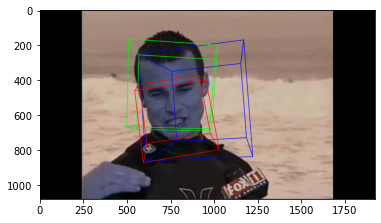

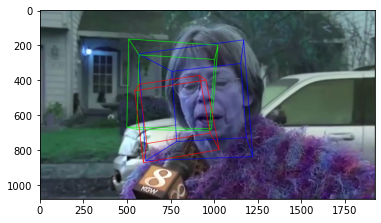

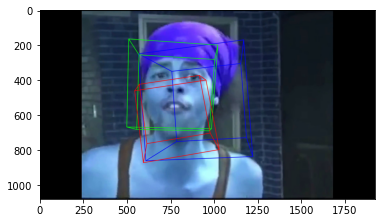

In [13]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#on affiche une image de la vidéo 0
img = mpimg.imread('vid0/frames_vid0_test/frame150.jpg')
imgplot = plt.imshow(img)
plt.show()

#on affiche une image de la vidéo 1
img = mpimg.imread('vid1/frames_vid1_test/frame150.jpg')
imgplot = plt.imshow(img)
plt.show()

#on affiche une image de la vidéo 2
img = mpimg.imread('vid2/frames_vid2_test/frame150.jpg')
imgplot = plt.imshow(img)
plt.show()





Il semblerait que la video 0 correspond au dataset C, la video 1 correspond au dataset a, la video 2 correspond au dataset b.
Mais vérifions cela informatiquement.

On dispose des images d'origines avec le cube tracé sur le visage dans la video "traced", on peut essayer de comparer chaque image de cette vidéo aux images que l'on trace pour chaque dataset et determiner pour quel dataset on a le plus de ressemblance avec les images d'origine !

In [17]:
import pyarrow.parquet as pq
import pandas as pd
import cv2
import numpy as np
import os
from PIL import Image
from PIL import ImageChops
from numpy import asarray
from copy import deepcopy
from matplotlib import pyplot
from code_source.trace_vecteurs import draw_head_pose
from skimage.metrics import structural_similarity as compare_ssim
import argparse

import cv2

# la fonction compare utilise une fonction de Skimage qui donne 
# un score de similarité entre 0 et 1 entre deux images.

def compare(im1,im2):
  # on convertie les deux images en gris 
  grayA = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  grayB = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  # et on les compare
  (score, diff) = compare_ssim(grayA, grayB, full=True)
  #on garde seulement de score entre 0 et 1
  return score


index_max_image = 30 # on trace que les 30 premières images pour la demo car les 300 sont déjà tracés (prend du temps à tracer)

# pour chaque vidéo on initialise une liste de match,
# (si deux image correspondent on considère que c'est un match), 
# on prendra le max des trois pour définir le dataset correspondant

nombre_de_matchvid0=[0,0,0]

#on parcourt les 300 frames de la vidéo tracé (ici 30 pour gain de temps)
for i in range(0,index_max_image):
  
  #on veut comparer chaque frame tracé avec un frame tracé d'après les données du dataset a

  #on trace le cubes pour les vecteurs a
  image = cv2.imread('vid0/frames_vid0/frame'+str(i)+'.jpg')
  data = asarray(image) 
  data = draw_head_pose(list_a[i],data,color=(255, 255, 255))
  #on recupère l'image avec le cube d'origine
  original = cv2.imread('vid0/frames_vid0_traced/frame'+str(i)+'.jpg')

  # data = frame tracé avec dataset a / original = frame tracé original :)
  
  
  # si le score de similarité est plus grand que 0.97 on considère que c'est un match
  if compare(data, original)>0.99:
     nombre_de_matchvid0[0] += 1

  # maintenant on compare les images en traçant les cubes avec le dataset b
  
  #on trace le cube des vecteurs b
  image = cv2.imread('vid0/frames_vid0/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_b[i],data,color=(255, 255, 255))


  #on la compare avec l'original
  if compare(data, original)>0.99:
     nombre_de_matchvid0[1] += 1
  
  # maintenant on compare les mêmes images en traçant les cubes avec le dataset c
  # on trace le cube c
  image = cv2.imread('vid0/frames_vid0/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_c[i],data,color=(255, 255, 255))
  
  #on la compare avec l'original
  if compare(data, original)>0.99:
     nombre_de_matchvid0[2] += 1


# On a maintenant une liste de score pour laquelle on va chercher le max
# (dataset a, b ou c correspondant au plus grand nombre de match avec l'original)
max=0
index_max=0
for i in range(3):
    if nombre_de_matchvid0[i] > max:
        max=nombre_de_matchvid0[i]
        index_max=i

# Maintenant que on a trouvé le max on l'associe à la lettre du dataset correspondant !
if index_max ==0:
    corresp='a'
if index_max ==1:
    corresp='b'
if index_max ==2:
    corresp='c'

# et on affiche le résultat !
print(nombre_de_matchvid0)
print('video 0 correspond aux vecteurs '+ corresp)



# On applique exactement le même principe pour la vidéo 1

# on initialise une liste identique
nombre_de_matchvid1=[0,0,0]

for i in range(0,index_max_image):

  #on cherche à comparer les images tracées avec le cube a avec l'original.

  # on trace le cube a
  image = cv2.imread('vid1/frames_vid1/frame'+str(i)+'.jpg')
  data = asarray(image) 
  data = draw_head_pose(list_a[i],data,color=(255, 255, 255))
  original = cv2.imread('vid1/frames_vid1_traced/frame'+str(i)+'.jpg')
  
  #on compare
  if compare(data, original)>0.98:
     nombre_de_matchvid1[0] += 1

  #on fait la même chose avec le cube b
  #on trace le cube b
  image = cv2.imread('vid1/frames_vid1/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_b[i],data,color=(255, 255, 255))
  
  #on compare
  if compare(data, original)>0.98:
     nombre_de_matchvid1[1] += 1

  image = cv2.imread('vid1/frames_vid1/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_c[i],data,color=(255, 255, 255))
   
  #on compare
  if compare(data, original)>0.98:
     nombre_de_matchvid1[2] += 1


max=0
index_max=0
for i in range(3):
    if nombre_de_matchvid1[i] > max:
        max=nombre_de_matchvid1[i]
        index_max=i

if index_max ==0:
    corresp='a'
if index_max ==1:
    corresp='b'
if index_max ==2:
    corresp='c'


#on affiche le résultat
print(nombre_de_matchvid1)
print('video 1 correspond aux vecteurs '+ corresp)



# Ainsi que pour la vidéo 2

nombre_de_matchvid2=[0,0,0]

for i in range(0,index_max_image):
  #on cherche à comparer les images tracées avec le cube a avec l'original.

  # on trace le cube a
  image = cv2.imread('vid2/frames_vid2/frame'+str(i)+'.jpg')
  data = asarray(image) 
  data = draw_head_pose(list_a[i],data,color=(255, 255, 255))
  
  original = cv2.imread('vid2/frames_vid2_traced/frame'+str(i)+'.jpg')
  
  #on compare avec l'original
  if compare(data, original)>0.99:
     nombre_de_matchvid2[0] += 1

  #même chose avec le cube b
  # on trace le cube b
  image = cv2.imread('vid2/frames_vid2/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_b[i],data,color=(255, 255, 255))
  #on compare
  if compare(data, original)>0.99:
     nombre_de_matchvid2[1] += 1

  #même chose avec le cube c
  #on trace le cube c 
  image = cv2.imread('vid2/frames_vid2/frame'+str(i)+'.jpg')
  data = asarray(image)
  data = draw_head_pose(list_c[i],data,color=(255, 255, 255))

  #on compare
  if compare(data, original)>0.99:
     nombre_de_matchvid2[2] += 1



max=0
index_max=0
for i in range(3):
    if nombre_de_matchvid2[i] > max:
        max=nombre_de_matchvid2[i]
        index_max=i

if index_max ==0:
    corresp='a'
if index_max ==1:
    corresp='b'
if index_max ==2:
    corresp='c'


print(nombre_de_matchvid2)
print('video 2 correspond aux vecteurs '+ corresp)



[2, 1, 30]
video 0 correspond aux vecteurs c
[29, 5, 2]
video 1 correspond aux vecteurs a
[0, 29, 1]
video 2 correspond aux vecteurs b



Pour les 300 images le code met longtemps à tourner car il compare 1800 images voici les résultats:



résultats pour la vidéo 0 : [7, 6, 300]

video 0 correspond aux vecteurs c


résultats pour la vidéo 1 : [299, 11, 7]

video 1 correspond aux vecteurs a


résultats pour la vidéo 2 : [6, 299, 6]

video 2 correspond aux vecteurs :b

On implemente nous même l'algorithme de reconnaissance faciale.

Pour cette partie je me suis inspiré de plusieurs travaux déjà réalisés, le code pour mark_detector et le code de pose_detector sont largement inspirés, j'ai utilisé les deux dans le main pour faire marcher un algorithme sur la vidéo 0.

- Pour le faire marcher il faut se placer dans le fichiers head-pose-estimation et lancer le main depuis le terminal avec la commande :

python3 main.py --video sample-0.mp4

(j'ai mis une copie de la vidéo 0 dans le dossier afin de faciliter l'accès mais cela marche aussi avec les autres vidéos en précisant le path)

- On peut aussi le lancer sans le parser --video et la video prise par défault sera celle de la caméra:

python3 main.py

il y a trois phases dans le main:

1. On detecte le visage humain avec le réseau de neurones de mark_detector.

2. On extrait de ce visage tous les landmarks nécessaires avec mark_detector.

3. On trouve une estimation de la pose avec pose_estimator en se basant sur les landmarks trouvés précedemment.

Le code du main est commenté.

